In [1]:
import matplotlib.pyplot as plt
from defipy import *

In [2]:
user_nm = 'swap_plot'
tkn1_amount = 5
tkn2_amount = 30

tkn1 = ERC20("TKN1", "0x111")
tkn2 = ERC20("TKN2", "0x09")
exchg_data = UniswapExchangeData(tkn0 = tkn1, tkn1 = tkn2, symbol="LP", address="0x011")

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, tkn1_amount, tkn2_amount)
lp.summary()

Exchange TKN1-TKN2 (LP)
Reserves: TKN1 = 5.0, TKN2 = 30.0
Liquidity: 12.24744871391589 



In [3]:
n_swaps = 5
pos = []

for k in range(n_swaps):
    
    select_tkn = EventSelectionModel().bi_select(0.5)
    if(select_tkn == 0):
        dy = TokenDeltaModel(lp.get_reserve(tkn2)).delta()
        out = Swap().apply(lp, tkn2, user_nm, dy)
    else:
        dy = TokenDeltaModel(lp.get_reserve(tkn1)).delta()
        out = Swap().apply(lp, tkn1, user_nm, dy)

    pos.append([lp.get_reserve(tkn1),
                lp.get_reserve(tkn2),
                lp.get_liquidity()])

In [4]:
x_max = 2*max([row[0] for row in pos]); 
x_min = 0.5*min([row[0] for row in pos])
y_max = 2*max([row[1] for row in pos])

L = res[0][2]
x_arr = np.arange(x_min, x_max, 0.01)
y_arr = L**2/x_arr

fig, (ax) = plt.subplots(nrows=1, sharex=False, sharey=False, figsize=(10, 5))
ax.plot(x_arr, y_arr, color = 'b',linestyle = 'dashdot', label='initial invest')

for k in range(n_swaps):
    x = pos[k][0]; y = pos[k][1]
    coord_col = 'g' if k == 0 else 'r'
    ax.hlines(y = y, xmin=0, xmax=x, linewidth=1, color=coord_col, linestyle = 'dashed')
    ax.vlines(x = x, ymin=0, ymax=y, linewidth=1, color=coord_col, linestyle = 'dashed')
    ax.plot(x, y, 'ro', color= coord_col)

ax.set_title(f'CPT Price Curve: Swap Simulations', fontsize=20)
ax.set_ylabel(f'{tkn2.token_name} Reserve Amt', size=15)
ax.set_xlabel(f'{tkn1.token_name} Reserve Amt', size=15)
ax.set_xlim((0,x_max))
ax.set_ylim((0,y_max))

NameError: name 'res' is not defined

In [5]:
user_nm = 'swap_plot'
tkn1_amount = 5
tkn2_amount = 30

tkn1 = ERC20("TKN1", "0x111")
tkn2 = ERC20("TKN2", "0x09")
exchg_data = UniswapExchangeData(tkn0 = tkn1, tkn1 = tkn2, symbol="LP", address="0x011")

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, tkn1_amount, tkn2_amount)
lp.summary()

Exchange TKN1-TKN2 (LP)
Reserves: TKN1 = 5.0, TKN2 = 30.0
Liquidity: 12.24744871391589 



In [6]:
n_events = 5
pos = []

for k in range(n_events):
    
    select_tkn = EventSelectionModel().bi_select(0.5)
    if(select_tkn == 0):
        dy = TokenDeltaModel(lp.get_reserve(tkn2)).delta()
        out = AddLiquidity().apply(lp, tkn2, user_nm, dy)
    else:
        dy = TokenDeltaModel(lp.get_reserve(tkn1)).delta()
        out = RemoveLiquidity().apply(lp, tkn1, user_nm, dy)

    pos.append([lp.get_reserve(tkn1),
                lp.get_reserve(tkn2),
                lp.get_liquidity()])

(0.0, 127.34294176606986)

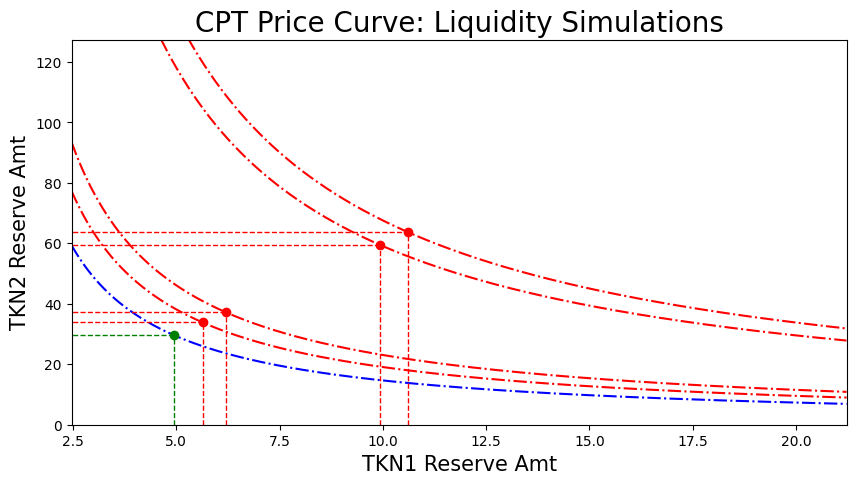

In [7]:
x_max = 2*max([row[0] for row in pos]); 
x_min = 0.5*min([row[0] for row in pos])
y_max = 2*max([row[1] for row in pos])

fig, (ax) = plt.subplots(nrows=1, sharex=False, sharey=False, figsize=(10, 5))

for k in range(n_events):

    L = pos[k][2]
    x_arr = np.arange(x_min, x_max, 0.01)
    y_arr = L**2/x_arr
    coord_col = 'b' if k == 0 else 'r'
    ax.plot(x_arr, y_arr, color = coord_col, linestyle = 'dashdot', label='initial invest')
    
    x = pos[k][0]; y = pos[k][1]
    coord_col = 'g' if k == 0 else 'r'
    ax.hlines(y = y, xmin=0, xmax=x, linewidth=1, color=coord_col, linestyle = 'dashed')
    ax.vlines(x = x, ymin=0, ymax=y, linewidth=1, color=coord_col, linestyle = 'dashed')
    ax.plot(x, y, 'ro', color= coord_col)

ax.set_title(f'CPT Price Curve: Liquidity Simulations', fontsize=20)
ax.set_ylabel(f'{tkn2.token_name} Reserve Amt', size=15)
ax.set_xlabel(f'{tkn1.token_name} Reserve Amt', size=15)
ax.set_xlim((x_min,x_max))
ax.set_ylim((0,y_max))